**2347215 Arunoth Symen A**             
*Lab Program - 3*

**1. Data Preprocessing**

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Data Augmentation: To improve generalization, apply data augmentation techniques.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

**2. Network Architecture Design**

Architecture Justification:     
**Input Layer:** The CIFAR-10 images have a shape of 32x32x3 (RGB color).   

**Hidden Layers:**
● Convolutional layers are used to capture spatial hierarchies and local patterns from the images.    

● MaxPooling layers are used for down-sampling, reducing spatial dimensions.  

● Dense layers at the end for classification.   

**Output Layer:** Use a softmax activation function to predict the 10 classes.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Input layer with Conv and MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

**3. Activation Functions**   
● ReLU (Rectified Linear Unit): Helps to solve the vanishing gradient problem and allows faster training. It's popular in convolutional layers.      
● Softmax: Used in the final layer to output class probabilities for multi-class classification.

**4. Loss Function and Optimizer**   
For this classification problem:   
● Use categorical crossentropy since it is suited for multi-class classification problems.   
● Compare mean squared error and categorical hinge with categorical crossentropy.

In [4]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Compile model with categorical crossentropy and Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**5. Training the Model**

In [5]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 129ms/step - accuracy: 0.2891 - loss: 1.9154 - val_accuracy: 0.5128 - val_loss: 1.3687
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 129s 113ms/step - accuracy: 0.4462 - loss: 1.5237 - val_accuracy: 0.5690 - val_loss: 1.2181
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 114ms/step - accuracy: 0.5029 - loss: 1.3841 - val_accuracy: 0.5837 - val_loss: 1.1997
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 116ms/step - accuracy: 0.5285 - loss: 1.3178 - val_accuracy: 0.6245 - val_loss: 1.0743
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 116ms/step - accuracy: 0.5587 - loss: 1.2513 - val_accuracy: 0.6237 - val_loss: 1.0612
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 115ms/step - accuracy: 0.5700 - loss: 1.2211 - val_accuracy: 0.6498 - val_loss: 1.0108
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 114ms/step - accuracy: 0.5787 - loss: 1.1920 - val_accuracy: 0.6394 - val_loss: 1.0251
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 116ms/step - accuracy: 0.5914 - loss: 1.158

**6. Model Evaluation**

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate model
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# Classification report
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1000
           1       0.82      0.92      0.87      1000
           2       0.79      0.57      0.66      1000
           3       0.65      0.47      0.55      1000
           4       0.75      0.70      0.72      1000
           5       0.68      0.64      0.66      1000
           6       0.79      0.83      0.81      1000
           7       0.69      0.89      0.78      1000
           8       0.85      0.85      0.85      1000
           9       0.79      0.88      0.83      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000

[[841  27  13   6   5   1   6  14  40  47]
 [ 10 919   1   2   0   1   5   1  12  49]
 [ 86   9 566  28  88  58  65  66  14  20]
 [ 23  15  48 474  60 164  71  69  34  42]
 [ 26   4  31  25 701  22  

**7. Optimization Strategies**  
● Early Stopping: Stop training when validation loss stops decreasing to avoid overfitting.  
● Learning Rate Scheduling: Gradually reduce the learning rate for smoother convergence.  
● Weight Initialization: Proper initialization (e.g., Xavier or He initialization) avoids vanishing/exploding gradients and ensures efficient training.

Weight Initialization Importance
Good weight initialization speeds up convergence by ensuring that activations are properly distributed across layers. Without proper initialization, the network can get stuck in a local minimum.

**8. Report**

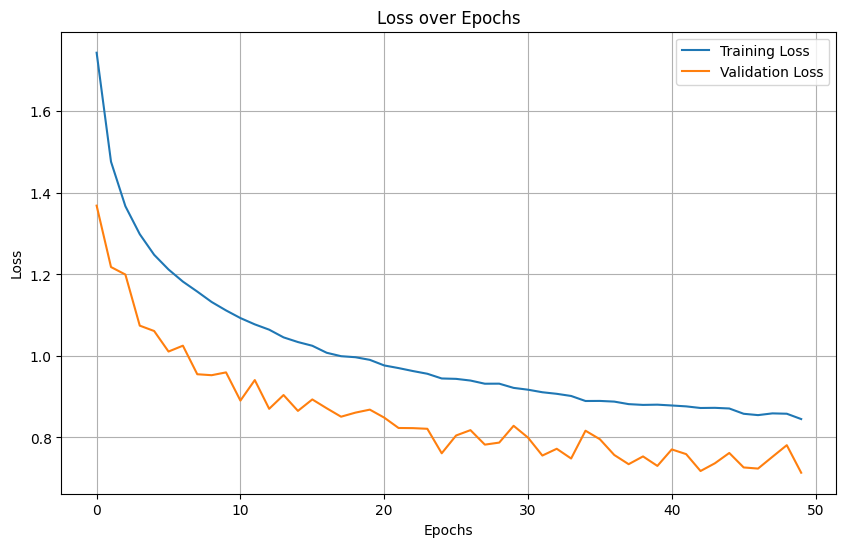

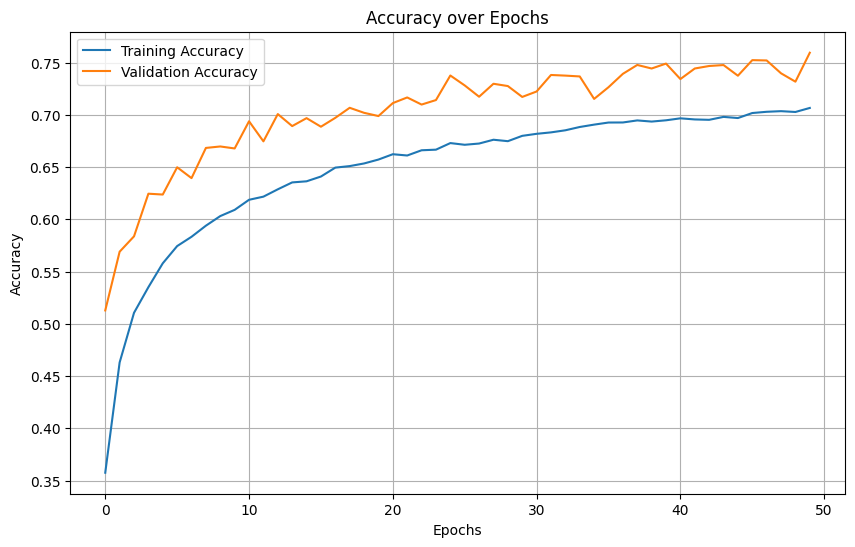

In [7]:
import matplotlib.pyplot as plt

# Plot the training loss and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the training accuracy and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize
plot_loss(history)
plot_accuracy(history)

Here are some of the key elements you would include in a report:   
● Architecture: Describe and justify the layers, number of filters, and activation functions.
● Training Results: Plot loss and accuracy over epochs for training and validation.   
● Hyperparameters: List the values for learning rate, batch size, and number of epochs.   
● Challenges and Solutions: Mention challenges like overfitting, slow convergence, or vanishing gradients, and how you addressed them (e.g., by using regularization, adjusting learning rate, or fine-tuning the architecture).